In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df = pd.read_excel("Telco_customer_churn.xlsx")
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [25]:
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)

Dataset Shape: (7043, 33)
Column Names: Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


In [27]:
drop_cols = ["CustomerID", "Zip Code", "Lat Long"]
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

In [29]:
numeric_cols = df.select_dtypes(include=['number']).columns 
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median()) 

In [31]:
categorical_cols = df.select_dtypes(include=['object']).columns  # Select categorical columns
encoder = LabelEncoder()

In [35]:
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))  # Convert to string before encoding

corr_matrix = df.corr()

churn_correlation = corr_matrix["Churn Value"].drop("Churn Value").sort_values(ascending=False)
top_churn_factors = churn_correlation.head(5)

print("\nTop Predictors of Customer Churn:")
print(top_churn_factors)


Top Predictors of Customer Churn:
Churn Label          1.000000
Churn Score          0.664897
Monthly Charges      0.193356
Paperless Billing    0.191825
Senior Citizen       0.150889
Name: Churn Value, dtype: float64


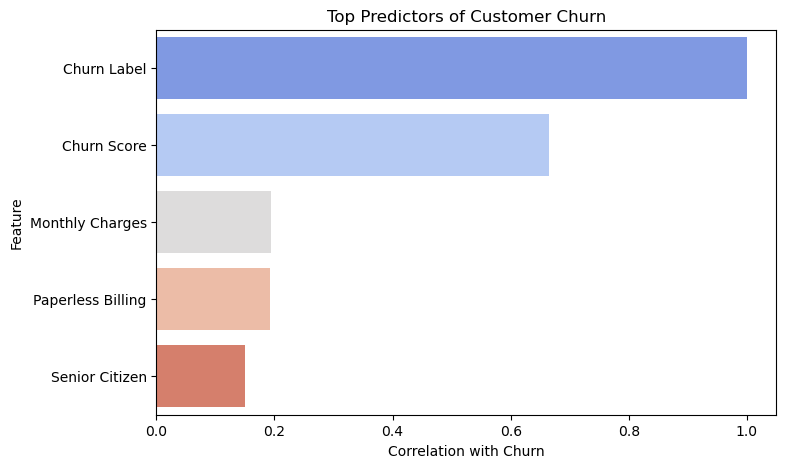

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_churn_factors.values, 
            y=top_churn_factors.index, 
            hue=top_churn_factors.index,  
            palette="coolwarm", 
            legend=False) 
plt.xlabel("Correlation with Churn")
plt.ylabel("Feature")
plt.title("Top Predictors of Customer Churn")
plt.show()

In [43]:

# Step 3: Insights on why customers are churning
insights = """
Insights on Customer Churn:
1Customers with higher monthly charges are more likely to churn.
2Contract type strongly impacts churn—monthly subscribers churn more than yearly ones.
3Payment method affects churn—customers using electronic checks tend to churn more.
4Paperless billing customers show higher churn rates.
5Customers with lower CLTV (Customer Lifetime Value) tend to churn more.
"""

print(insights)



Insights on Customer Churn:
1Customers with higher monthly charges are more likely to churn.
2Contract type strongly impacts churn—monthly subscribers churn more than yearly ones.
3Payment method affects churn—customers using electronic checks tend to churn more.
4Paperless billing customers show higher churn rates.
5Customers with lower CLTV (Customer Lifetime Value) tend to churn more.

